In [2]:
import sys

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [147]:
xdomain = np.arange(0.0, 1.0, 0.01)

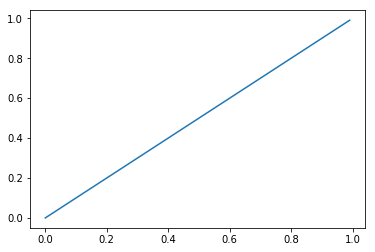

In [148]:
plt.plot(xdomain, xdomain)

In [169]:
def f(x):
    return (1.0 / (1 + np.exp(-(x* 10))))

In [225]:
def f(x):
    return (1.0 / (1.0001 - x**.0025))

In [226]:
f(0), f(0.1), f(0.25), f(0.5), f(0.75), f(0.9), f(0.95), f(0.99), f(1.0)

(0.9999000099990001,
 171.23504509210167,
 280.91961615273465,
 546.0400783459473,
 1221.0808147847279,
 2752.0415863803814,
 4381.640647317694,
 7991.974524239207,
 10000.0000000011)

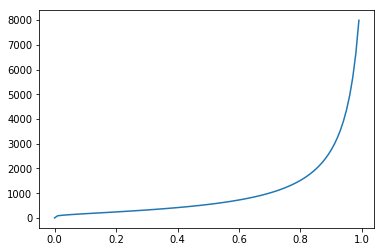

In [227]:
plt.plot(xdomain, [f(x) for x in xdomain])

In [2]:
mat = [[1,  2,  3],
       [4,  5,  6]]

In [3]:
a = np.array(mat)

In [4]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
np.rot90(a)

array([[3, 6],
       [2, 5],
       [1, 4]])

In [6]:
np.rot90(a, axes=(0,1))
# default

array([[3, 6],
       [2, 5],
       [1, 4]])

In [7]:
np.rot90(a, axes=(1,0))

array([[4, 1],
       [5, 2],
       [6, 3]])

In [8]:
np.rot90(np.rot90(np.fliplr(a)))

array([[4, 5, 6],
       [1, 2, 3]])

In [9]:
np.flipud(a)

array([[4, 5, 6],
       [1, 2, 3]])

In [10]:
a[1:, 1:3]

array([[5, 6]])

In [11]:
mat2 = [['w', '.', 'b'],
       ['w', '.', 'b'],
      ['w', '.', 'b']]

In [12]:
aa = np.array(mat2)

In [13]:
aa

array([['w', '.', 'b'],
       ['w', '.', 'b'],
       ['w', '.', 'b']],
      dtype='<U1')

In [14]:
aa[aa == 'w'] = 'Z'
aa[aa == 'b'] = 'X'
aa[[aa == 'Z']] = 'b'
aa[[aa == 'X']] = 'w'

In [15]:
bb = aa.copy()

In [16]:
bb

array([['b', '.', 'w'],
       ['b', '.', 'w'],
       ['b', '.', 'w']],
      dtype='<U1')

In [17]:
bb[bb == 'b'] = '@'

In [18]:
bb

array([['@', '.', 'w'],
       ['@', '.', 'w'],
       ['@', '.', 'w']],
      dtype='<U1')

In [19]:
aa

array([['b', '.', 'w'],
       ['b', '.', 'w'],
       ['b', '.', 'w']],
      dtype='<U1')

In [20]:
np.count_nonzero((aa == 'b') | (aa == 'w'))

6

In [ ]:
d[a.tostring()] = a

In [ ]:
d[a.tostring()] 

In [ ]:
a.tostring()

In [ ]:
a

In [ ]:
list(reversed([1, 2, 3]))

In [ ]:
np.vstack((np.array(['+'] * a.shape[1]), a))

In [ ]:
np.vstack((a, np.array(['+'] * a.shape[1]),))

In [ ]:
np.hstack((np.array(['+'] * a.shape[0]).reshape((a.shape[0], 1)), a))

In [ ]:
np.hstack((a, np.array(['+'] * a.shape[0]).reshape((a.shape[0], 1))))

In [ ]:
np.count_nonzero(np.array(['+'] * a.shape[0]).reshape((a.shape[0], 1)) == '+')

In [ ]:
def pretty_print(pattern):
    rows = pattern.split('\r\n')
    for row in rows:
        cells = row.split(',')

EMPTY = '.'
BLACK = 'b'
WHITE = 'w'
def pretty_print2(pattern):
    for r in range(len(pattern)):
        for c in range(len(pattern[0])):
            color = pattern[r][c]
            if color is None or color == EMPTY:
                sys.stdout.write('. ')
            elif color == WHITE:
                sys.stdout.write('o ')
            elif color == BLACK:
                sys.stdout.write('x ')
            else:
                sys.stdout.write(color + ' ')
        sys.stdout.write('\n')

In [ ]:
df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_historical.csv_numgames_59_numpatterns_703.csv",
                index_col='pattern')


In [ ]:
df = df.drop(('matched_sgf'), axis=1)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_moyogo.csv_numgames_42784_numpatterns_153981.csv")
# df2 = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_oldkifu.csv_numgames_12_numpatterns_50.csv")

epochs = ["C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_historical2_numgames_59_numpatterns_684.csv",
          "C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_sorin_numgames_254_numpatterns_2371.csv",
          "C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_historical_numgames_59_numpatterns_684.csv",
          "C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_chochikun_numgames_1634_numpatterns_11200.csv"]

df = None
FREQ_COL = 'frequency'
for epoch in epochs:
    print('processing', epoch)
    fname = epoch[:-4].split('\\')[-1]
    toks = fname.split('_')
    name = toks[1]
    num_games = int(toks[3])
    num_patterns = int(toks[5])
    print(name, num_games, num_patterns)
    epoch_df = pd.read_csv(epoch, index_col='pattern')
    if 'matched_sgf' in epoch_df.columns:
        epoch_df = epoch_df.drop(('matched_sgf'), axis=1)
    if df is None:
        df = epoch_df
    else:
        assert FREQ_COL not in df.columns
        print('df cols:', df.columns)
        print('epoch cols:', epoch_df.columns)
        df = df.join(epoch_df, how='outer', lsuffix='_base', rsuffix='_epoch')
    #if FREQ_COL+'_base' in df.columns:
    #    df = df.drop((FREQ_COL+'_base'), axis=1)
    #if FREQ_COL+'_epoch' in df.columns:
    #    df[FREQ_COL] = df[FREQ_COL+'_epoch'] 
    #    df = df.drop((FREQ_COL+'_epoch'), axis=1)
    assert name not in df.columns
    print('df cols:', df.columns)
    print('epoch cols:', epoch_df.columns)
    df[name] = 1.0 * df[FREQ_COL]/num_games
    df = df.drop((FREQ_COL), axis=1)
    print ("df.columns", df.columns)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df[pd.isnull(df)] = 0

In [ ]:
df.sort_values(by='historical2', ascending=False).head()

In [ ]:
df.sort_values(by='historical2', ascending=False).iloc[2].name.split('\r\n')

In [ ]:
df1.index=df1['pattern']
df1 = df1.drop(('pattern'), axis=1)
df2.index=df2['pattern']
df2 = df2.drop(('pattern'), axis=1)

In [ ]:
df_1_2 = df1.join(df2, lsuffix='_1', rsuffix='_2')

In [ ]:
df_1_2[pd.notnull(df_1_2['frequency_2'])].iloc[0]['matched_sgf_1']

In [ ]:
def printable_pattern(pattern):
    return [r.replace(',', ' ') for r in pattern.split('\r\n')]

In [ ]:
df_1_2[pd.notnull(df_1_2['frequency_2'])].iloc[0].name

In [ ]:
printable_pattern(df_1_2[pd.notnull(df_1_2['frequency_2'])].iloc[0].name)

In [ ]:
df.head(20)

In [ ]:
import numpy
import scipy.optimize
import itertools

sin = lambda r, phi, x: r * np.sin(phi * x)

def func(r, x):
    x0, fval, grid, Jout = scipy.optimize.brute(
        sin, ranges=[(-np.pi, np.pi)], args=(r, x), Ns=10, full_output=True)
    return dict(phi_at_min=x0[0], result_min=fval, phis=grid, result_at_grid=Jout)


rs = numpy.linspace(-1, 1, 10)
xs = numpy.linspace(0, 1, 10)

vals = list(itertools.product(rs, xs))

result = [func(r, x) for r, x in vals]

# idk whether this is the best way of generating the DataFrame, but it works
df = pd.DataFrame(vals, columns=['r', 'x'])
df = pd.concat((pd.DataFrame(result), df), axis=1)
df.head()

In [ ]:
df.columns

In [ ]:
[(c, df[c].dtype) for c in df.columns]

In [ ]:
df['phis'][0]

In [ ]:
np.ndarray.tostring(df['phis'][0])

In [ ]:
df.to_csv("C:/tmp/test.csv")

In [ ]:
df2 = pd.read_csv("C:/tmp/test.csv")

In [ ]:
df2.head()

In [ ]:
[(c, df2[c].dtype) for c in df2.columns]

In [ ]:
np.fromstring(df2['phis'][0], dtype=np.float)

In [ ]:
df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\oldkifu.csv")

In [ ]:
df.head()

In [ ]:
df['pattern'][0]

In [ ]:
pretty_print(df['pattern'][0])

In [ ]:
d = [['=', '=', '='],
    ['=', None, 'b'],
    ['=', 'w', 'w']
    ]

In [ ]:
nd = np.array(d, dtype=str)

In [ ]:
d

In [ ]:
nd[nd == 'None'] = '.'

In [ ]:
nd

In [ ]:
for row in d:
    print(row)

In [ ]:
pretty_print2(d)

In [ ]:
# code for np.array to string, to_csv, read_csv, display, be sure to retrieve initial np.array
def np_pattern_to_string(pattern, cell_sep=',', row_sep='\n'):
    return row_sep.join([cell_sep.join(pattern[r,:]) for r in range(pattern.shape[0])])

def string_to_np_pattern(pattern, cell_sep=',', row_sep='\n'):
    return np.array([row.split(cell_sep) for row in pattern.split(row_sep)])

In [ ]:
pattern_str = np_pattern_to_string(nd)

In [ ]:
pattern_str

In [ ]:
nd2 = string_to_np_pattern(pattern_str)

In [ ]:
nd == nd2

In [ ]:
[','.join(nd[r, :]) for r in range(nd.shape[0])]

In [ ]:
nd

In [ ]:
(nd == nd).all()

In [ ]:
# Given a collection of SGF files, read the date/time, plot how many records/year

In [23]:
import re
import sys
sys.path.append("C:\\Users\\sorin\\Documents\\GitHub\\sgfmill")
sys.path.append("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns")

In [24]:
import fnmatch
import os

from sgfmill import sgf, sgf_moves

In [26]:
date_pattern1 = re.compile('\d\d\d\d-(\d)?\d-(\d)?\d')
date_pattern2 = re.compile('\d\d\d\d/(\d)?\d/(\d)?\d')
date_pattern3 = re.compile('\d\d\d\d')
date_pattern4 = re.compile('\d\d\d')

In [27]:
assert date_pattern2.search("DT[2016/9/22]").group(0) == "2016/9/22"

In [28]:
pd.to_datetime("2016/9/22")

Timestamp('2016-09-22 00:00:00')

In [85]:
from datetime import datetime

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime.strptime('1625-01-01', '%Y-%m-%d').year
datetime.strptime('1625-1-09', '%Y-%m-%d').year
datetime.strptime('625-1-09', '%Y-%m-%d').year

ValueError: time data '625-1-09' does not match format '%Y-%m-%d'

In [87]:
datetime.now().year

2018

In [79]:
datetime_object.year

1625

In [30]:
# read_game_date("C:\\Users\\sorin\\kifu\\collections\\gotopics\\12at1-3.sgf", verbose=True)
read_game_date("C:\\Users\\sorin\\kifu\\collections\\gogod\\0196-1699\\1650JQXG006.sgf", verbose=True)

Missing DT in filename: C:\Users\sorin\kifu\collections\gogod\0196-1699\1650JQXG006.sgf


In [31]:
# root_dir = "C:\\Users\\sorin\\kifu\\historical"
root_dir = "C:\\Users\\sorin\\kifu\\collections\\gotopics" # Num successes:  23517 num errors:  53
# root_dir = "C:\\Users\\sorin\\kifu\\collections\\ChoChikun" # Num successes:  1680 num errors:  6
# root_dir = "C:\\Users\\sorin\\kifu\\collections\\aeb" # Num successes:  46989 num errors:  2686
# root_dir = "C:\\Users\\sorin\\kifu\\collections\\gogod" Num successes:  22036 num errors:  872
# root_dir = "C:\\Users\\sorin\\kifu\\collections\\moyogo" #

game_dates = []
game_paths = []
num_errors = 0
for root, dirnames, filenames in os.walk(root_dir):
    for filename in fnmatch.filter(filenames, '*.sgf'):
        pathname = os.path.join(root, filename)
        # print("processing:", pathname)
        try:
            date = read_game_date(pathname)
            if date is not None:
                game_dates.append(date)
                game_paths.append(pathname)
            else:
                # sys.stderr.write("No date found SGF: %s\n" % pathname)
                num_errors += 1
        except Exception as e:
            num_errors += 1
            sys.stderr.write("Cannot read/parse SGF: %s error: %s\n" % (pathname, e))

Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\11bc06.sgf error: no SGF data found
Missing DT in filename: C:\Users\sorin\kifu\collections\gotopics\13nc1-2.sgf
Failed to find a datetime in the SGF or in filename: C:\Users\sorin\kifu\collections\gotopics\2016al18.sgf. DT: []
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-1.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-2.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-3.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-4.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-5.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-6.sgf error: no SGF data found
Cannot read/parse SGF: C:\Users\sorin\kifu\collections\gotopics\22lg2-7.sgf error: no SGF data found
C

In [32]:
print("Num successes: ", len(game_dates), "num errors: ", num_errors)

Num successes:  23516 num errors:  54


In [33]:
# sgf_dates = pd.DataFrame({'date':pd.to_datetime(datetimes)})
sgf_dates = pd.DataFrame({'date' : game_dates, 'sgf': game_paths})

In [34]:
sgf_dates.shape

(23516, 2)

In [35]:
sgf_dates['date'].describe()

count                   23516
unique                   4921
top       2012-07-09 00:00:00
freq                       53
first     1983-01-13 00:00:00
last      2018-01-26 00:00:00
Name: date, dtype: object

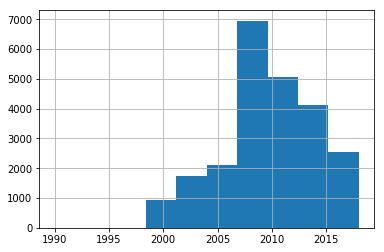

In [36]:
sgf_dates['date'].dt.year[sgf_dates['date'].dt.year >= 1990].hist()
# sgf_dates['date'].dt.year.hist()

In [37]:
sgf_dates['date'].dt.year.value_counts()

2008    2370
2007    2302
2009    2279
2012    1813
2010    1710
2011    1555
2016    1415
2014    1393
2015    1378
2013    1347
2017    1091
2003     979
2005     951
2006     778
2002     775
2001     517
2000     388
2004     364
2018      54
1999      35
1992       7
1983       7
1984       5
1985       2
1990       1
Name: date, dtype: int64

In [38]:
sgf_dates['date'].dt.year[sgf_dates['date'].dt.year > 2003].value_counts()

2008    2370
2007    2302
2009    2279
2012    1813
2010    1710
2011    1555
2016    1415
2014    1393
2015    1378
2013    1347
2017    1091
2005     951
2006     778
2004     364
2018      54
Name: date, dtype: int64

In [39]:
sgf_dates[sgf_dates['date'].dt.year < 1800]['sgf'].values

array([], dtype=object)

In [40]:
sgf_dates.head()

,date,sgf
0,1984-09-12,C:\Users\sorin\kifu\collections\gotopics\09mt1...
1,1984-09-26,C:\Users\sorin\kifu\collections\gotopics\09mt2...
2,1984-10-03,C:\Users\sorin\kifu\collections\gotopics\09mt3...
3,1984-10-17,C:\Users\sorin\kifu\collections\gotopics\09mt4...
4,1985-10-24,C:\Users\sorin\kifu\collections\gotopics\09mt5...


In [62]:
# After running find_patterns_in_collection, loading the output
# collection_df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_historical_numgames_58.csv")
# collection_df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_historical3_numgames_58.csv")
collection_df = pd.read_csv("C:\\Users\\sorin\\Documents\\GitHub\\gopatterns\\collection_gogod2_numgames_22908.csv")

In [63]:
collection_df.head()

,pattern,sgf_filename,year
0,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\gogod\0196-169...,1678
1,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\gogod\0196-169...,1678
2,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\gogod\0196-169...,1678
3,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\gogod\0196-169...,1678
4,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\gogod\0196-169...,1678


In [64]:
collection_df.shape

(392381, 3)

In [65]:
collection_df['year'].min(), collection_df['year'].max()

(1678, 2033)

In [66]:
collection_df['year'].value_counts()

2002    18991
2003    17718
2001    17164
1995    15304
2000    14307
1997    12542
1996    11741
1991    11177
1992    10738
1993    10696
1994    10173
1990    10115
1989     8828
1999     7659
1982     7143
1998     6724
1981     6426
1983     6365
1987     6216
1988     6005
2004     5885
1980     5649
1986     5113
1979     4988
1985     3887
1850     3868
1976     3635
1984     3558
1934     3297
1978     3150
        ...  
1817       24
1733       24
1773       23
1769       23
1692       23
1704       23
1826       22
1701       22
1781       21
1830       21
1832       21
1783       20
1696       20
1684       19
1780       19
1691       18
1763       18
1774       18
1768       17
1779       16
1772       16
1749       16
1689       16
1807       14
1836       14
2033       13
1720       12
1735        9
1751        8
1727        6
Name: year, Length: 261, dtype: int64

In [47]:
pattern_frequency_df = collection_df[['pattern', 'year']].groupby(['pattern']).count().sort_values(by='year', ascending=False)

In [48]:
pattern_frequency_df.head()

,year
pattern,
. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . b . . =\r\nb . . . w . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n= = = = = = = = = =,31
. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . b . . =\r\n. . . . w . . . . =\r\n. . . . . w . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n= = = = = = = = = =,25
. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . b . . . =\r\n. . . b . . b . . =\r\n. . . . w . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n= = = = = = = = = =,12
. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . b . . =\r\n. . . . . . . . . =\r\nw . . . . b . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n= = = = = = = = = =,9
. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n. . . . . . b . . =\r\n. . . b . . . . . =\r\n. . . . . w . . . =\r\n. . . . . . . . . =\r\n. . . . . . . . . =\r\n= = = = = = = = = =,9


In [49]:
for i in range(10):
    print ("number of years:", pattern_frequency_df.iloc[i]['year'])
    print(pattern_frequency_df.iloc[i].name)
    print()

number of years: 31
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =

number of years: 25
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =

number of years: 12
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =

number of years: 9
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =

number of years: 9
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . 

In [50]:
collection_by_year_df = collection_df.groupby(['year', 'pattern']).count().sort_values(by='sgf_filename', ascending=False)

In [51]:
collection_by_year_df.head()

sgf_filename
year pattern                                                         
1853 . . . . . . . . . =\r\n. . . . . . . . . =\r\n....            12
     . . . . . . . . . =\r\n. . . . . . . . . =\r\n....             9
     . . . . . . . . . =\r\n. . . . . . . . . =\r\n....             8
     . . . . . . . . . =\r\n. . . . . . . . . =\r\n....             4
     . . . . . . . . . =\r\n. . . . . . . . . =\r\n....             4

In [52]:
# number of games in given year (make sure to avoid double-counting, since the same sgf will be repeated for all patterns)
collection_df['sgf_filename'][collection_df['year'] == 1853].unique().shape[0]

23

In [53]:
# total number of games in given year (make sure to avoid double-counting, since the same sgf will be repeated for all patterns)
collection_df['sgf_filename'][collection_df['year'] == 1853].unique().shape[0]

23

In [54]:
# Number of games in given year where a pattern occured
# TODO this may over count, if a pattern occurs more than once in a game, fix that
pattern = collection_by_year_df.iloc[0].name[1]
year = 1853
collection_by_year_df.loc[year, pattern]['sgf_filename']

12

In [55]:
collection_df[(collection_df['pattern'] == pattern) & (collection_df['year'] == year)]['sgf_filename'].unique().shape[0]

10

In [56]:
print(collection_by_year_df.iloc[0].name[1])

. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


In [67]:
# Find the most frequent patterns in each year, to get some candidates for visualization
years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))
frequent_patterns = set()
for year in years:
    top_patterns_in_year = collection_df.where(collection_df['year'] == year)['pattern'].value_counts()
    for i in range(min(3, len(top_patterns_in_year))):
        frequent_patterns.add(top_patterns_in_year.index[i])

In [68]:
len(frequent_patterns)

183

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . w . . . =
w b . . . . w . . =
w w b . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


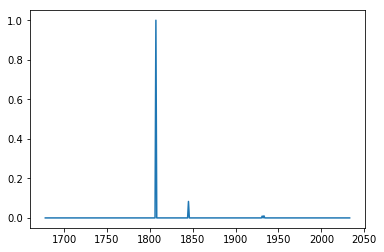


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
w b . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


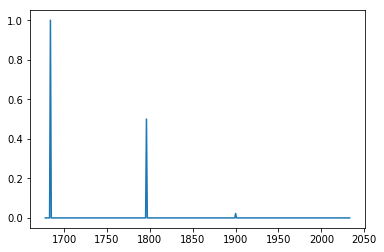


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
b . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


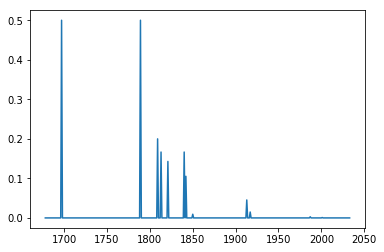


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


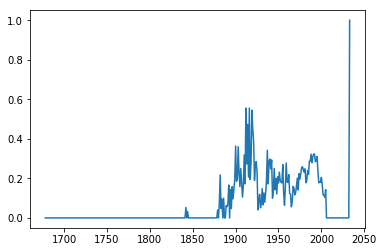


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
. w . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


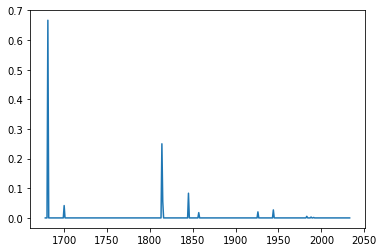


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . . . . . . =
b . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . b . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


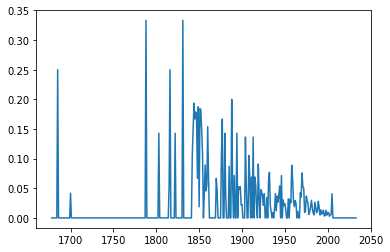


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w . . . =
. . . . . . b . . =
. . . . w . . . . =
b . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


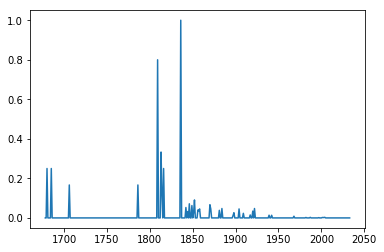


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . . . . =
. . . b w w w . . =
w . . b b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . . . . . . . =
. . . . . b b . . =
. . . . w . w . . =
. b . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


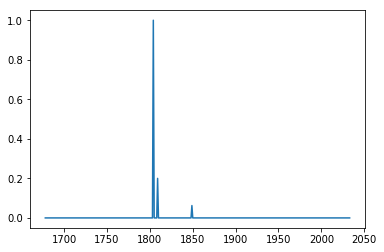


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . b . w b . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


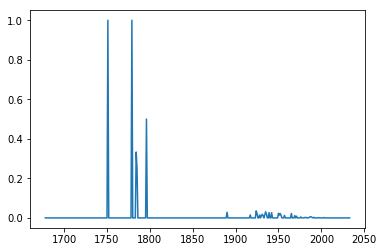


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . b . . . . =
. . . . . w w . . =
. . . . b . . . . =
. w . . b w . . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


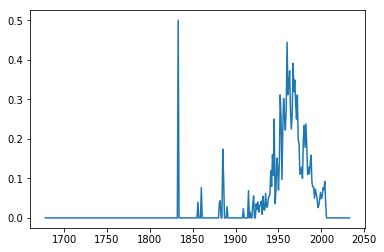


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . b . . . . =
. . . . b w . . . =
. . . . w . . . . =
. . . . . . . . . =
= = = = = = = = = =


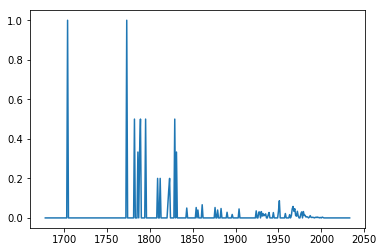


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
w . . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


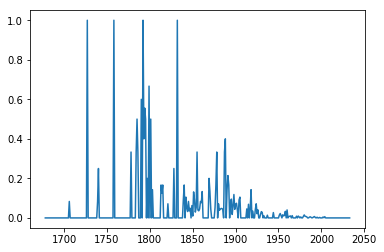


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


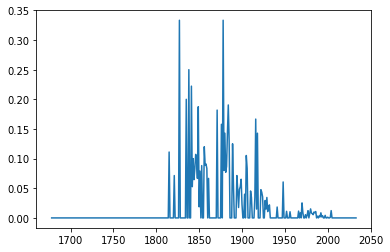


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . w . . . =
. . . . . . w . . =
w b . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


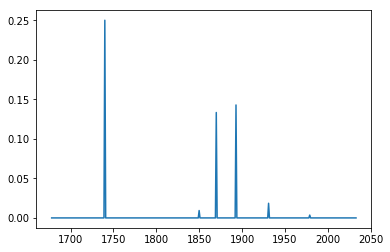


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
w . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


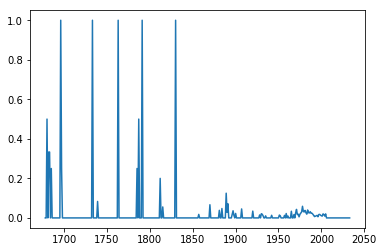


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b b . . =
. . . . . w b . . =
. . . . . . w w . =
. b . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. b . w . . . . . =
. . . . . . . . . =
. b . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


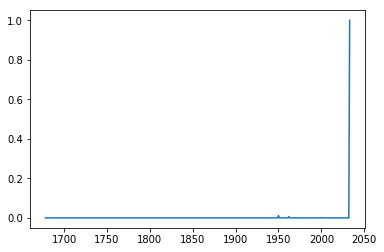


---------------
. . . . . . . . . =
. . . . . . . . . =
. . b . . . . . . =
. . w b . . . . . =
. . w b . b . . . =
. . . w . . b . . =
w . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . b . =
. . . . . . w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


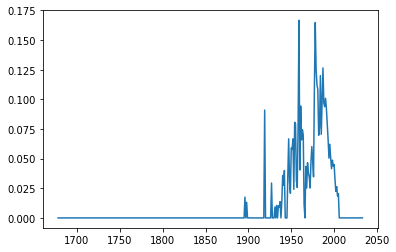


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
w . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


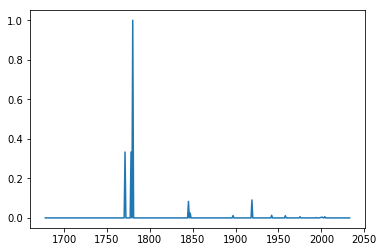


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . b . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


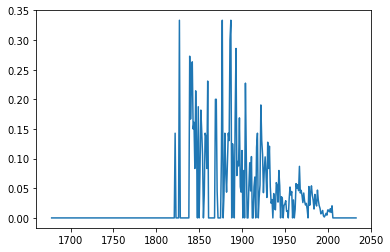


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . . . w . . . =
. w . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


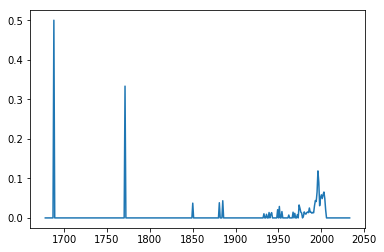


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b w . . . =
. . b . . . . . . =
. w b . b . w . . =
. . w w b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


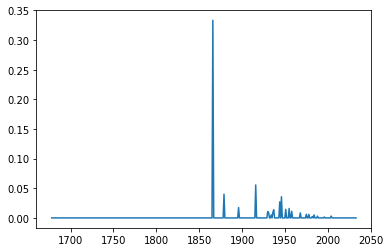


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. w . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


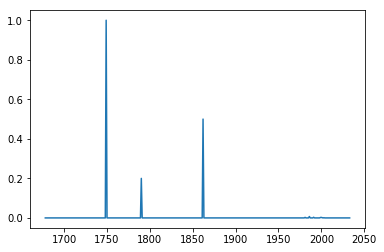


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . b . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


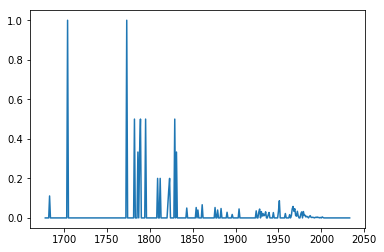


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
w . . . . . . . . =
. . . . w . b . . =
b . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


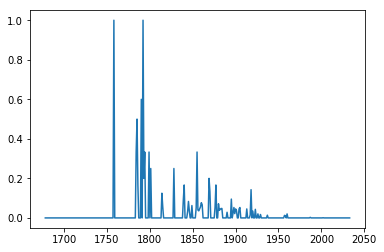


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . b . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


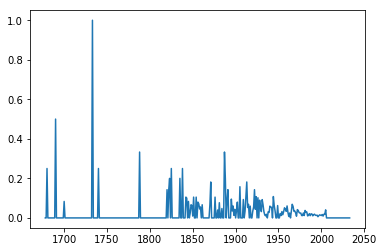


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . w . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


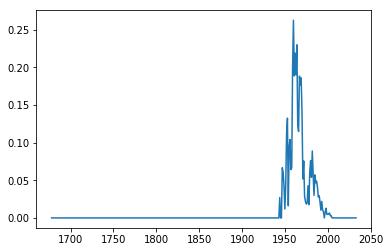


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. w . . . . b . . =
b w . . . . . . . =
b . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w w . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


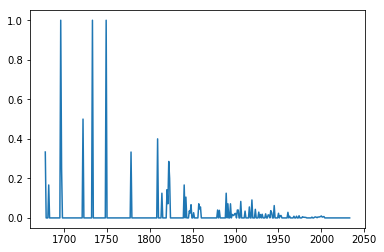


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. b . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


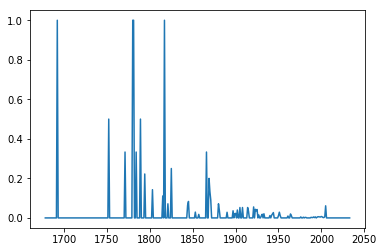


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. w . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


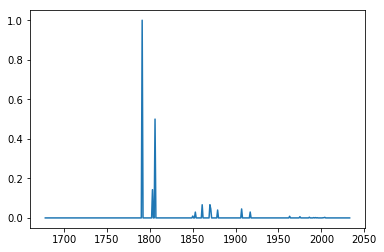


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
w . . b w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


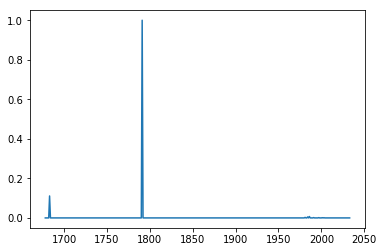


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
w . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


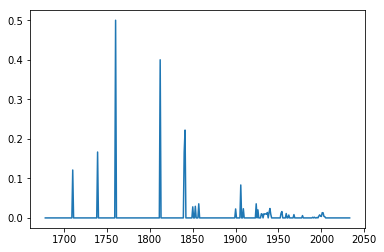


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . w . w . . =
. . w w b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


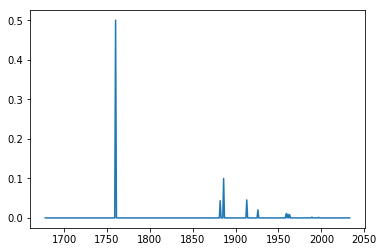


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b . . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


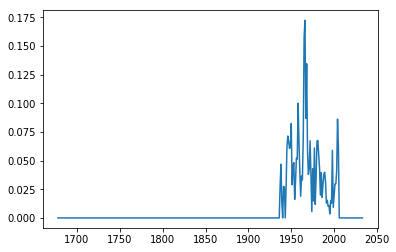


---------------
. . . . . . . . . =
. . . . b . b . . =
. . . . . . . . . =
b . w . . . . . . =
. . . . . . . . . =
. . w . b . b . . =
b . w b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . b . . . =
. b . . . . w . . =
w b . . b . . . . =
. w w . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
b . w . . . . . . =
. . . . . b . . . =
b . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b b . . =
w . . . . . w . . =
. . . . b . . . . =
. . w . . b . . . =
. . . . w b . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only f

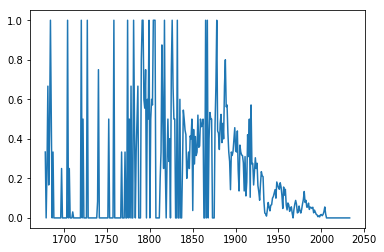


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . w . . b . . =
b . . . w b . . . =
. . . . . w b . . =
. . . . . . . . . =
= = = = = = = = = =


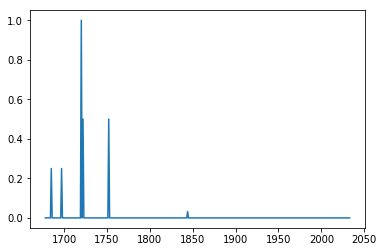


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . w . . w . . =
w . b . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


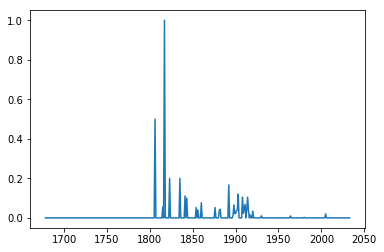


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . w . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


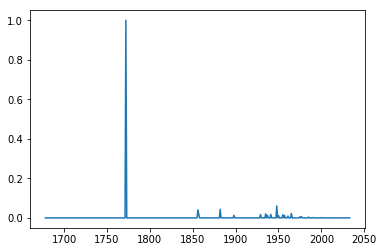


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . b . . . . =
. . . w b w . . . =
. . w b w . . . . =
. . . . . . . . . =
= = = = = = = = = =


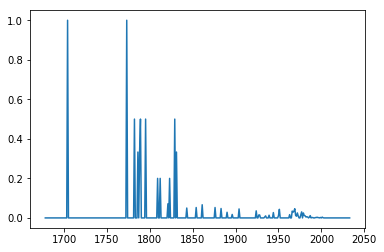


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. b w . . . . . . =
b w . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


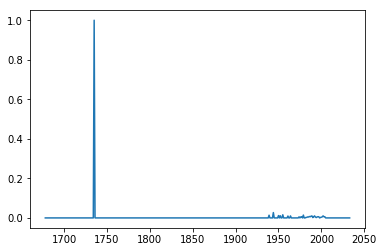


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . b . . . . =
. . . w b w b . . =
. . w . w b . . . =
. . . w . . . . . =
= = = = = = = = = =


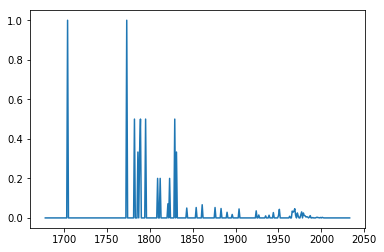


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. w . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


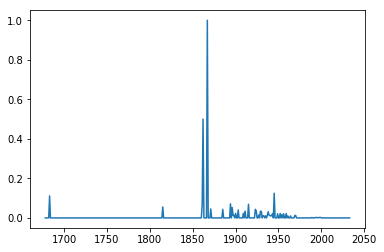


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
w . . . . . . . . =
. . . . w . b . . =
b w . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


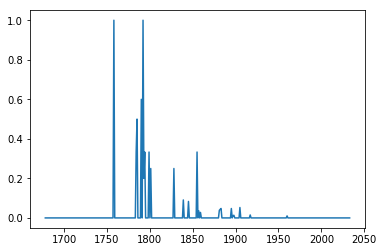


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


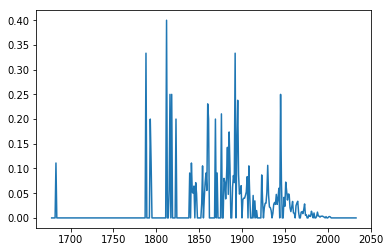


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
b . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


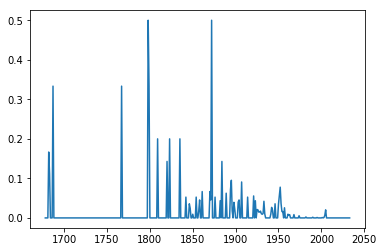


---------------
. . . . . . . . . =
. . . . b . . . . =
. . . . . . w . . =
. . . . . b . . . =
. w . . . b w . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
b . w . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


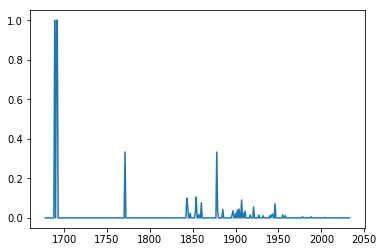


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . b . . . =
. . w b . . b . . =
b . w . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


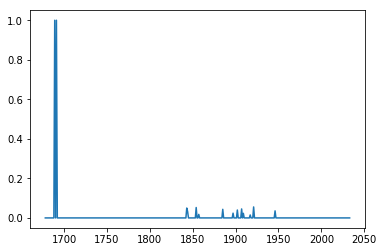


---------------
. . . . . . . . . =
. . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . w . w . . =
w . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


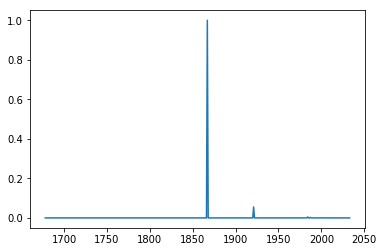


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . b . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


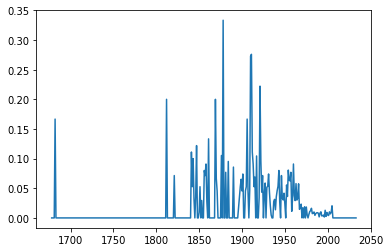


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . . . . . . b . =
. . . . . w w . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


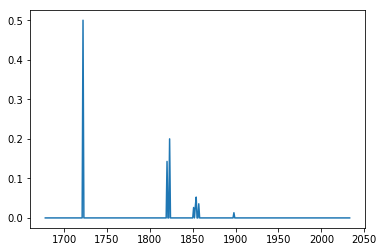


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


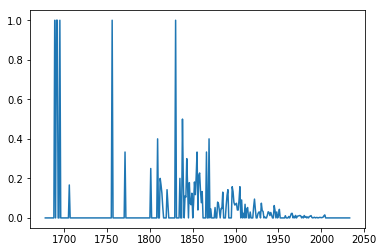


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. b . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


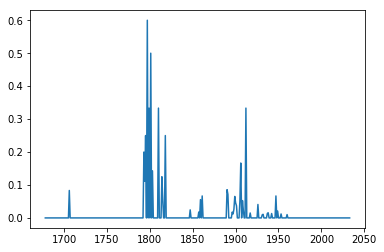


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


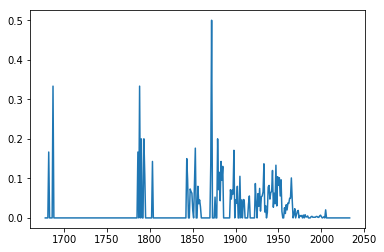


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b w . . . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


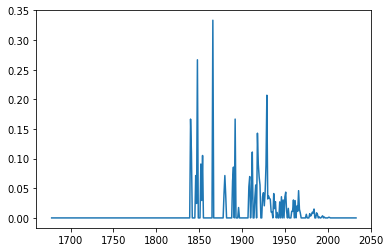


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
w . . . . w . . . =
. . b w . . w . . =
w . b . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


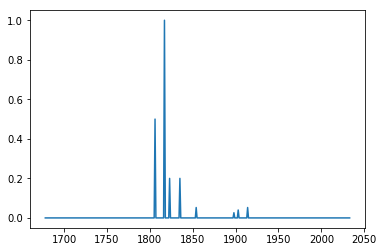


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . . . . w . . =
w . . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


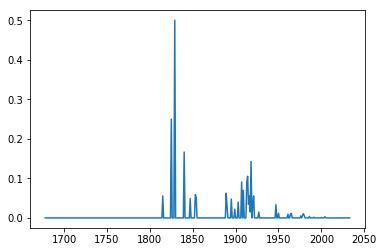


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . . . b . . . =
. . . b w . . . . =
. . . . b . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


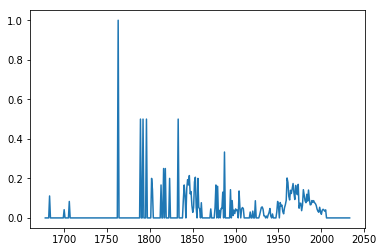


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
w . b . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


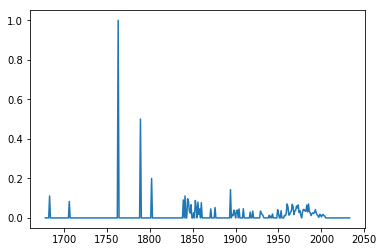


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
w . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


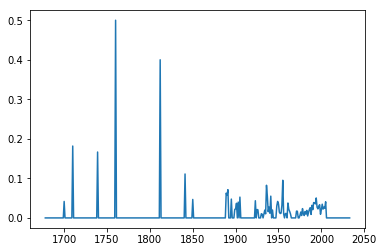


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. w . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


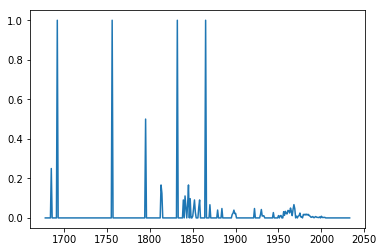


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b w . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


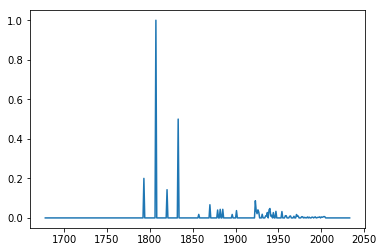


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . w . . . . =
. . . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b b w b . . =
. b . . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


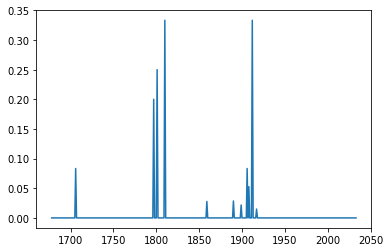


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . w . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


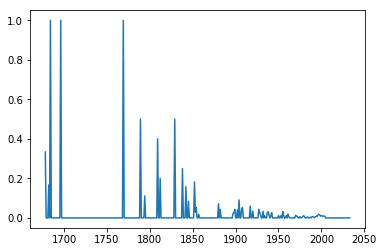


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w w . . =
. . w . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


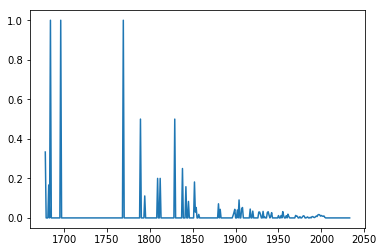


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . . b b w . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


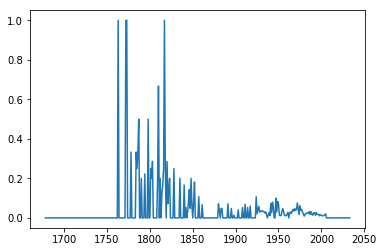


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . b . =
. . . . w . b . . =
. . . . . w w b . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


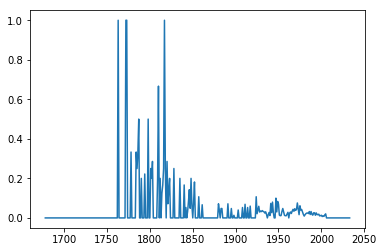


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


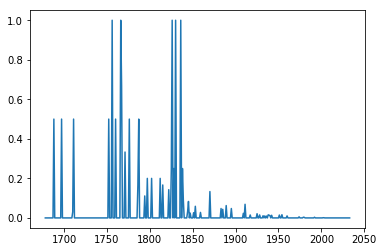


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


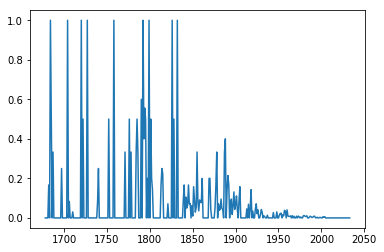


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . w . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


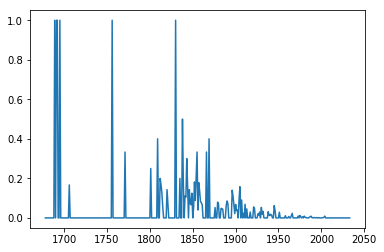


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


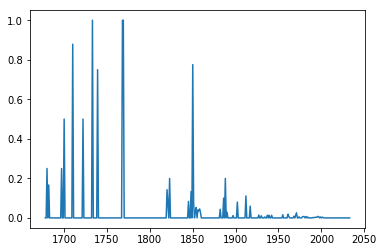


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . . . . . =
. . . . . . w . . =
w b . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


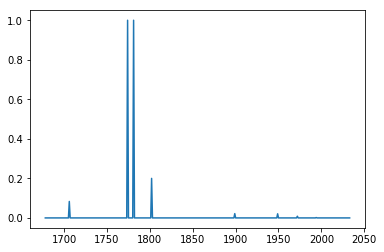


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b b . . =
. . b . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


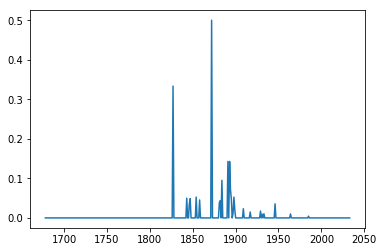


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


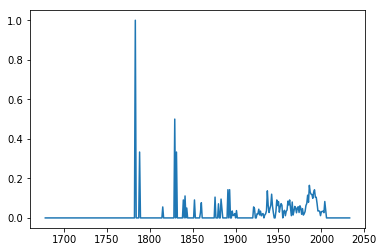


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . . . . . . =
. . . . . . . . . =
. b . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


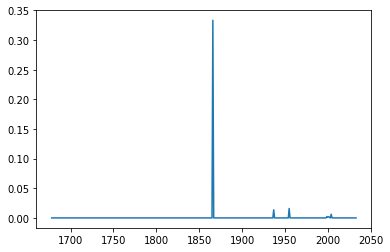


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


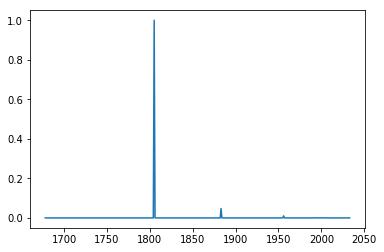


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


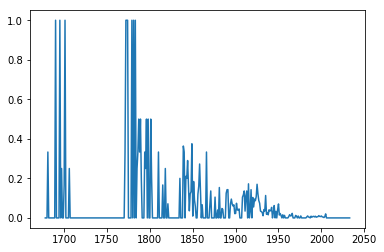


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . w . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


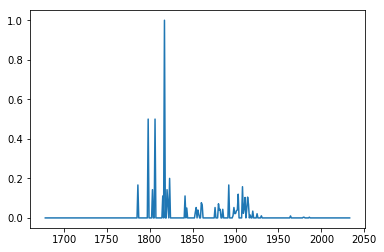


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . b b w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


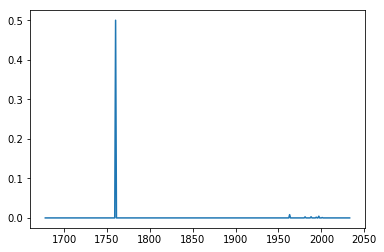


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


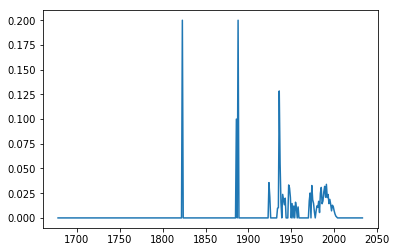


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


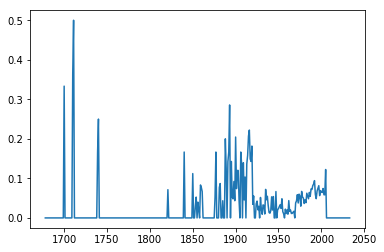


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


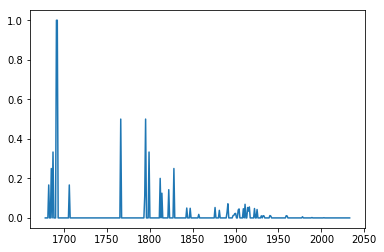


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. w . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


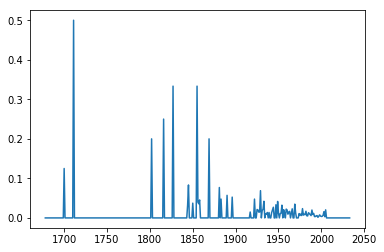


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b w . . . . . =
. . b w . w . . . =
. . . b . . w . . =
. . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


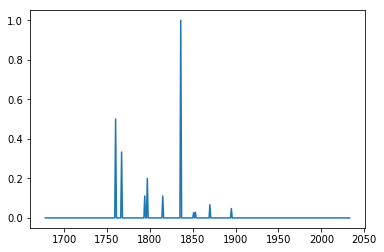


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . b . . . =
b w . w . . b . . =
b . b . w . . . . =
. . . . . . w . . =
. . . . . . . . . =
= = = = = = = = = =


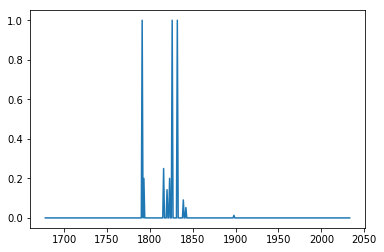


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. b . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


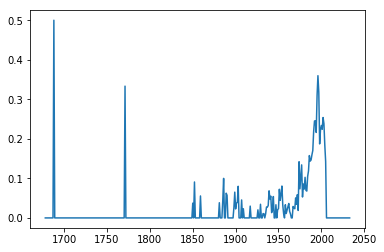


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . b w w . . . =
. . . . b . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


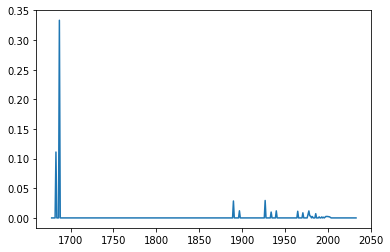


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . . . . =
. w . . . . b . . =
. . . . w . . . . =
. . b . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . . . . . =
. . . . . w w . . =
. . . . b . b . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . w . . =
. . w . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


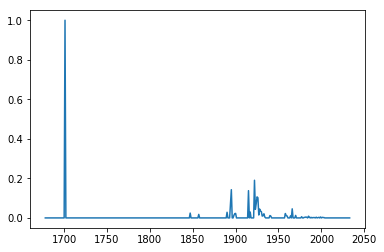


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w b . . =
. . . . . . . . . =
. . . . . . b . . =
. b . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


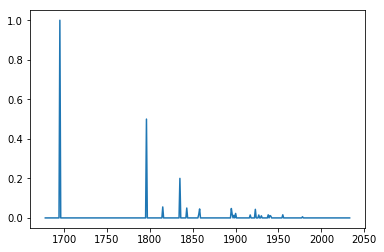


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b w w . . . =
. . . . b . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


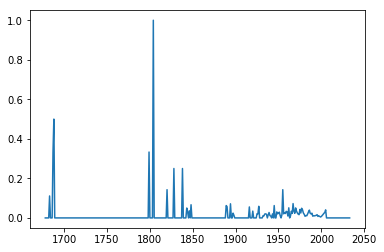


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


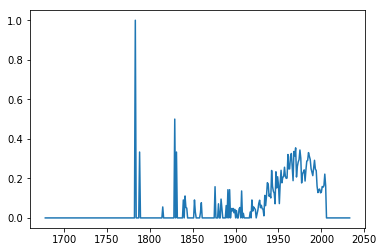


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


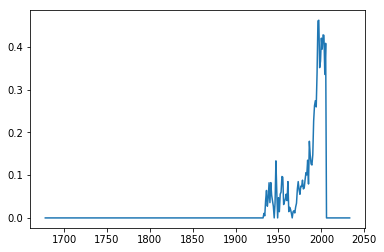


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . b . w b . . =
. . . . . w b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


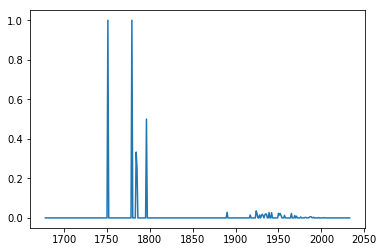


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . b . . . =
. . . w . . b . . =
b . b . w . . . . =
. . . . . . w . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


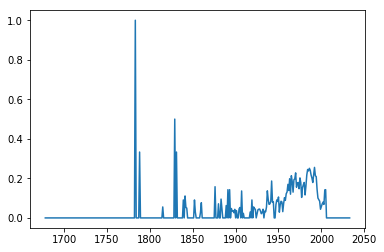


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . b w w . . . =
. . b w b . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


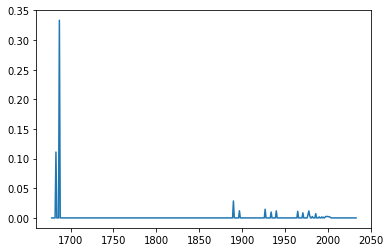


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


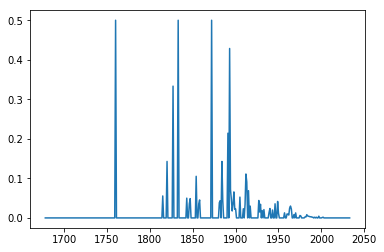


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . w . b . . =
b . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


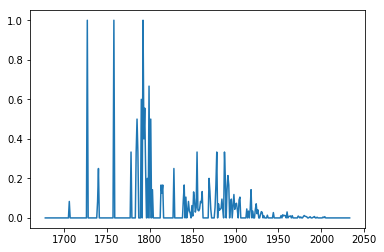


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


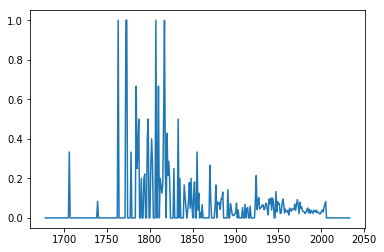


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. b . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


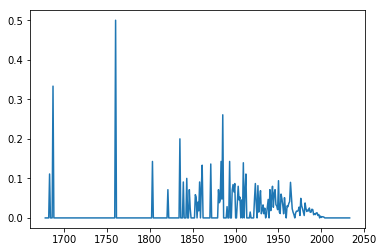


---------------
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w w . . =
b . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


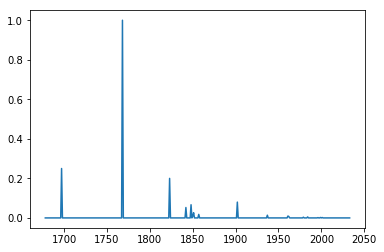


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . b . . =
. . . . w . . . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


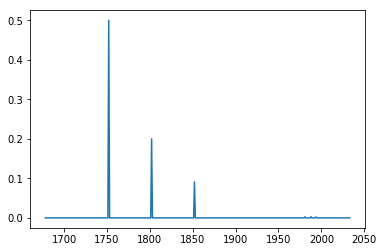


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . b . . . =
. b . . . w b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . b . . =
. . . . . . . . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


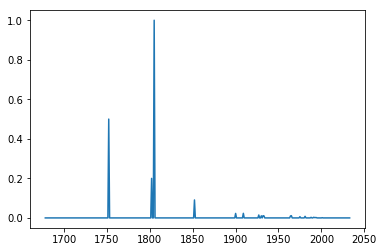


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . w w w . . =
. . w . . b b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


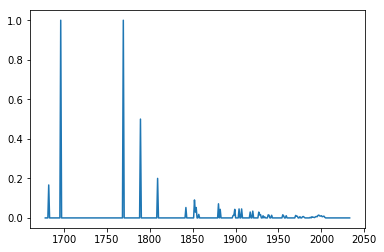


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . b . . =
b . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


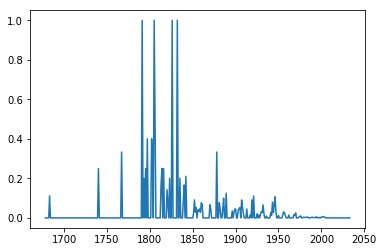


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


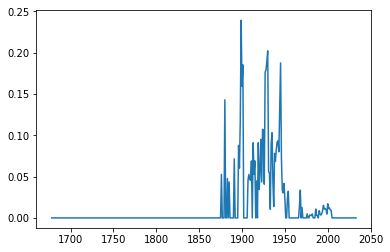


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =


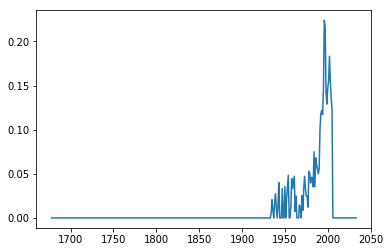


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . w b w w . . =
. . . . b b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


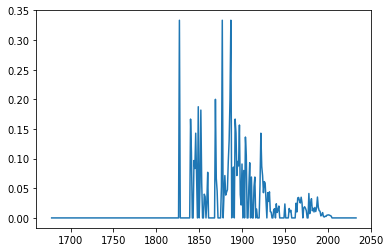


---------------
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


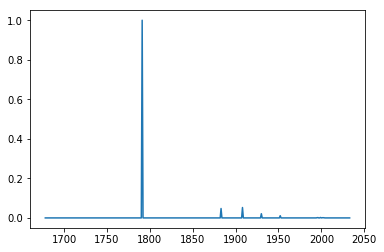


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
b . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


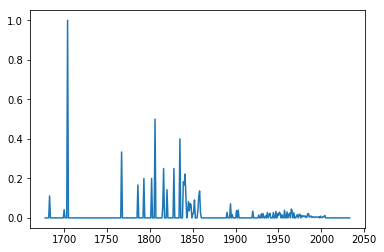


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


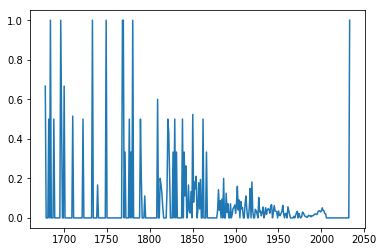


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . w . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


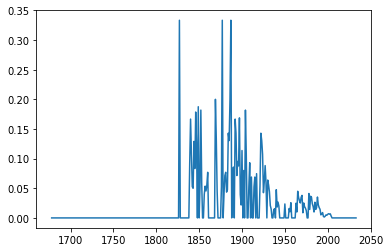


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . w . . =
. . . w w . . . . =
. . b . b b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


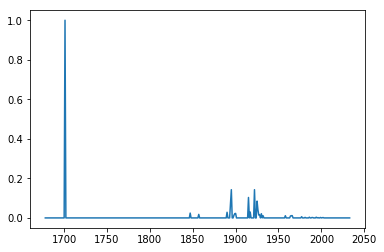


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . w . . =
w . . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


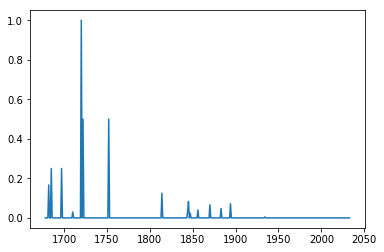


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . b . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


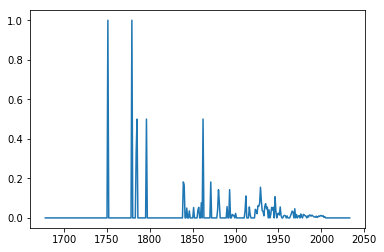


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . b b . . =
. . . . . . w w . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


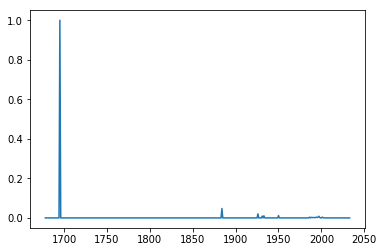


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b w w . . =
. . . . . b w . . =
. . w . b . b w . =
. . . . . . b . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . b . w . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . w . w . . =
w . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


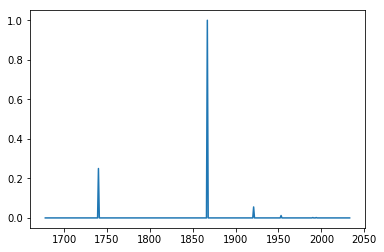


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b . . . w . . =
. . w . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


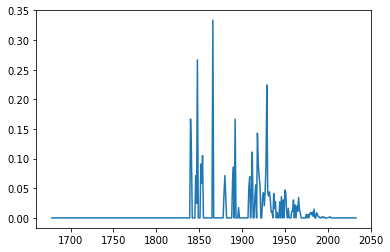


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
w . . . . . . . . =
. w . . w . b . . =
b w . . w b . . . =
. b . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


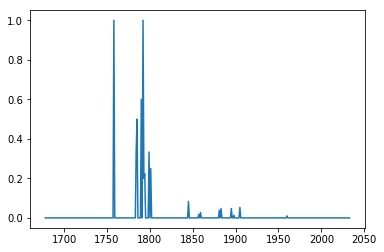


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


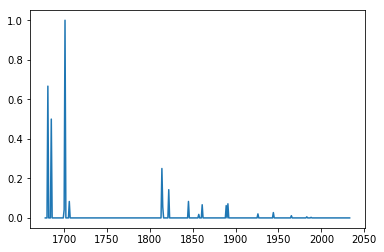


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . b b . . . . =
. . . . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


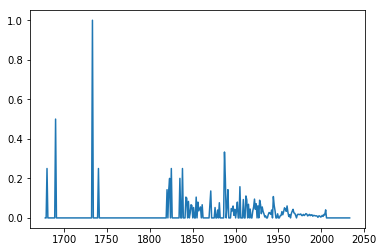


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


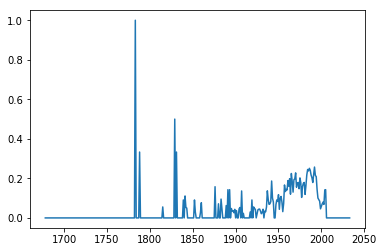


---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . w . w . . =
. . . . b . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


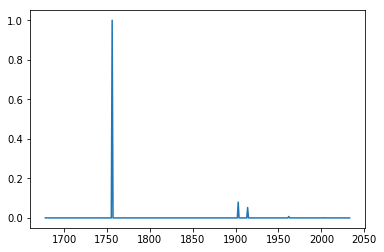


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . . b . . . =
. . . b . . b . . =
. . w . w . . . . =
. . . . . . w . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . w . =
. . . . . w w b . =
. . w . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


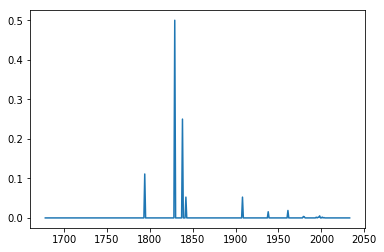


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. w . w . . . . . =
. . . . . b . . . =
. b . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


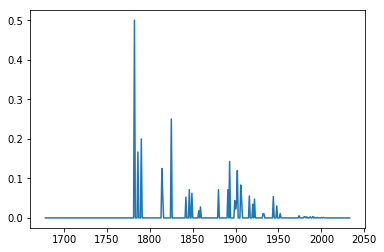


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . w b . . . =
. . . . . b . . . =
. . . . . . . . . =
= = = = = = = = = =


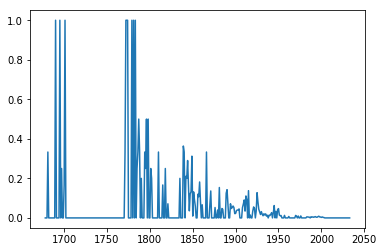


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


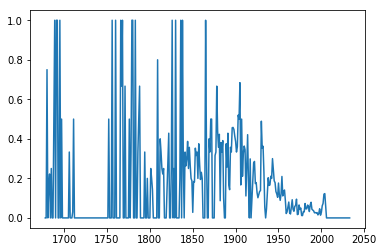


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . b . . . . =
. . . w b w . . . =
. . w . w b . . . =
. . . w . . . . . =
= = = = = = = = = =


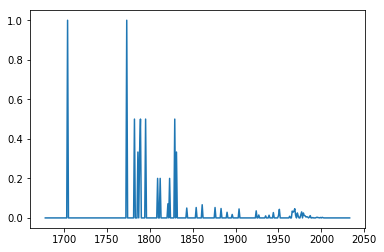


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . . . b . . . =
. . . b w . . . . =
. . . . b w . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b w b . . =
. . . b w b b . . =
. . . . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


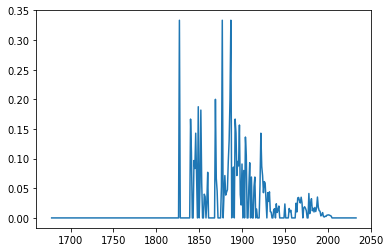


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . . . . . . . . =
. . . . . w w . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


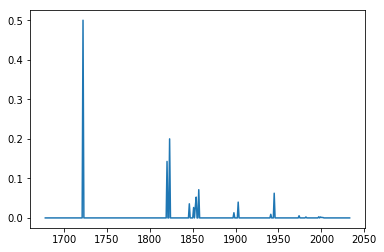


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
w . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


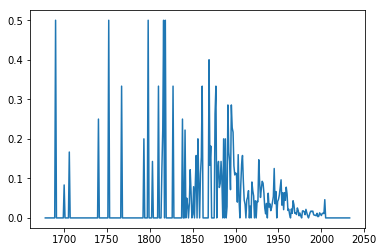


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
b . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


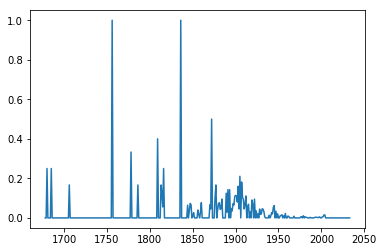


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . b . . =
. w . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


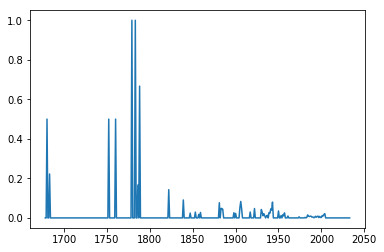


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
w . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


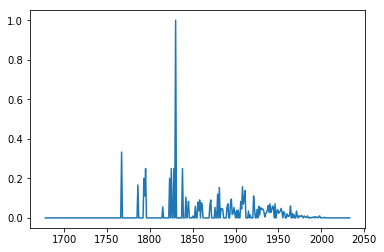


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. w . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


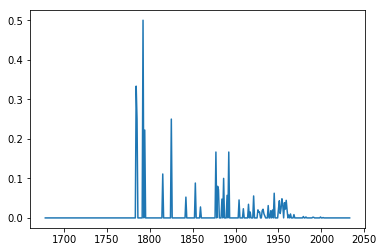


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. w . . w . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


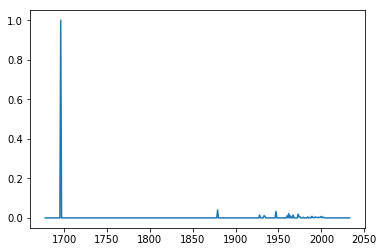


---------------
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


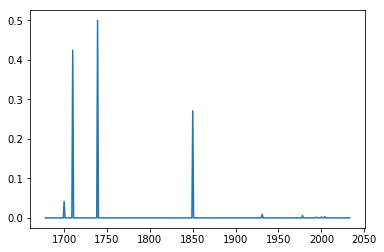


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


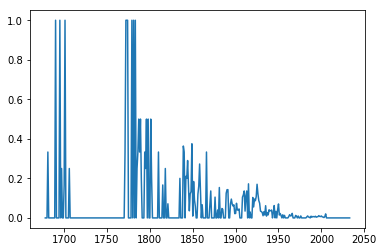


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . b . b w . =
. . . . . . w b . =
. . . . w . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w b . . =
. . . . . . b . . =
. b . . . w b . . =
. . . . w . w b . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . w . . . . . =
. . b w . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


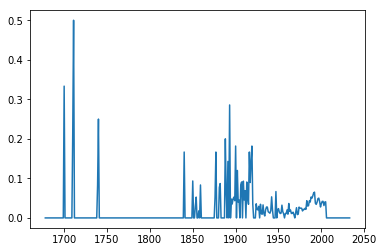


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


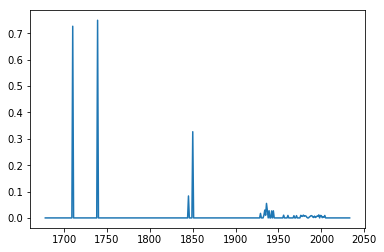


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


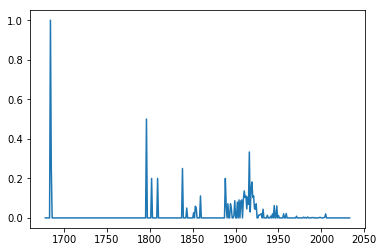


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


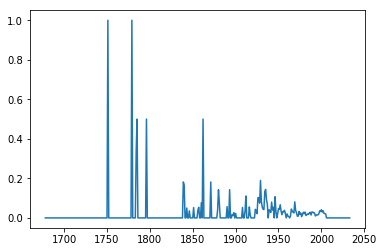


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . w . w . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


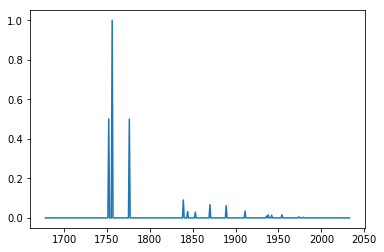


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. b w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


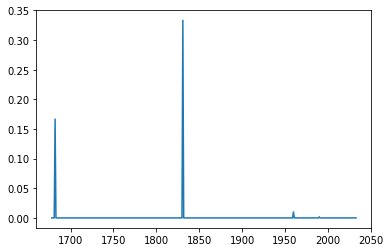


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. b . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


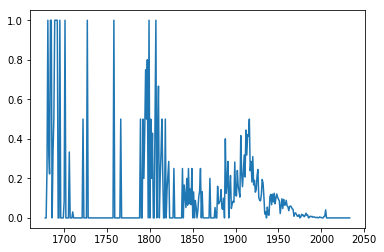


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . b . . . . . =
. . w . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


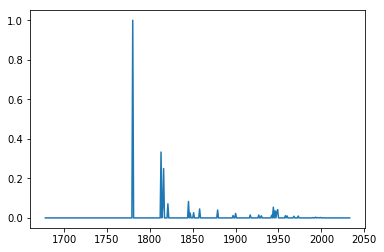


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


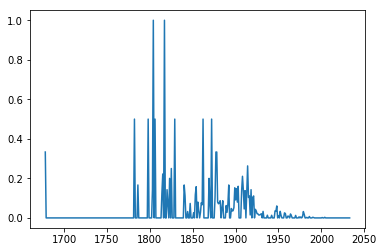


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


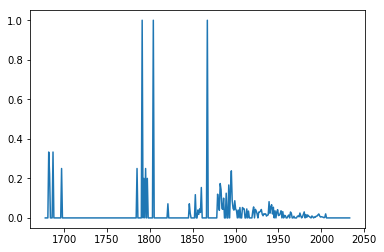


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . b . . w . =
. . . b . . w b . =
. . . . w . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 1 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . w b . . b . . =
. . w . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


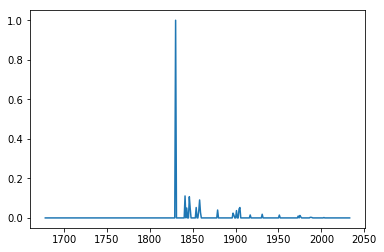


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . w b . . =
. . b w . . b . . =
. . . b . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


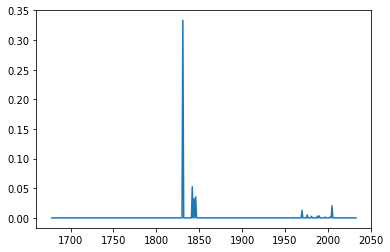


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


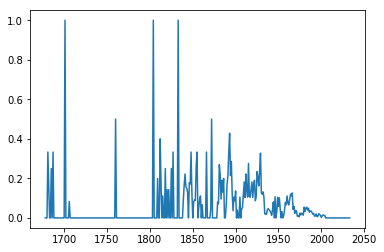


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . . . b w . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


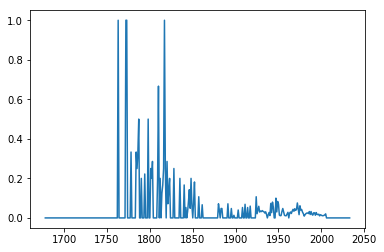


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . w . . . b . . =
. . . . . w b . . =
. . . . w . w . . =
. . . . . . . . . =
= = = = = = = = = =


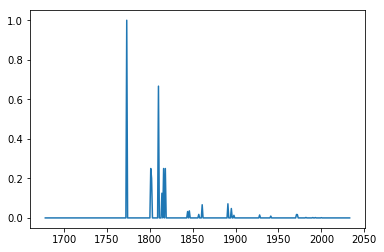


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . b w . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


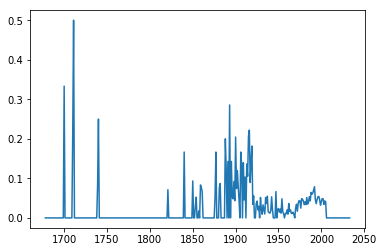


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . w . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


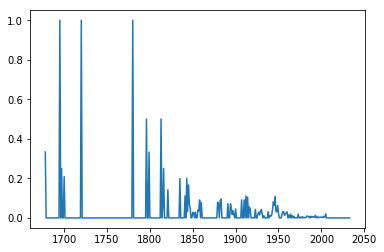


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . w . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


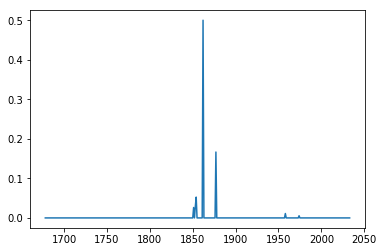


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . . . . . . =
. w b . . w . . . =
. . . b . . w . . =
. w . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . b . . . . =
. . . . . w . . . =
. . b . b . w . . =
. w w . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . b . . b w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =
Skipping plot, only found in 2 years

---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


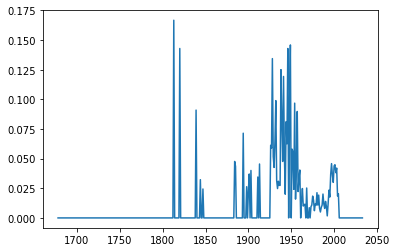


---------------
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


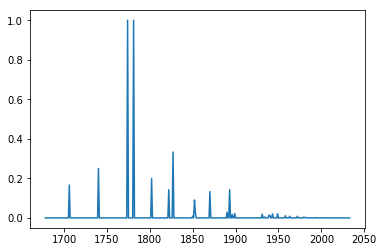

In [70]:
# Visualize the frequency of a given pattern over years, as ratio of number of games in given year with pattern over total
# number of games in given year
# pattern = collection_by_year_df.iloc[0].name[1] # TODO actual pattern, make a function param

years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))

for pattern in frequent_patterns:
    pat_freq = []
    num_years_with_pattern = 0
    for year in years:
        num_games_in_year = collection_df['sgf_filename'][collection_df['year'] == year].unique().shape[0]
        num_games_in_year_with_pattern = 0
        try:
            num_games_in_year_with_pattern = collection_df[(collection_df['pattern'] == pattern) & 
                                                           (collection_df['year'] == year)]['sgf_filename'].unique().shape[0]
        except KeyError:
            pass
        # print(year, num_games_in_year, num_games_in_year_with_pattern)
        assert num_games_in_year >= num_games_in_year_with_pattern
        if num_games_in_year_with_pattern > 0:
            num_years_with_pattern += 1
        freq = 0
        if num_games_in_year != 0:
            freq = 1.0 * num_games_in_year_with_pattern / num_games_in_year
        pat_freq.append(freq)
    print("---------------")
    print(pattern)
    if num_years_with_pattern <= 2:
        print("Skipping plot, only found in %s years" % num_years_with_pattern)
    else:
        plt.figure()
        plt.plot(years, pat_freq)
        plt.show()
    print()

In [60]:
from gopatterns.indexer import PatternIndex

index = PatternIndex(pat_dim=(9, 9),
                         min_stones_in_pattern=3,
                         max_stones_in_pattern=10,
                         max_moves=40,
                         only_corners=True)
 
(x, y) = index.find_patterns_in_game("C:\\Users\\sorin\\kifu\\collections\\gogod\\2003\\judan-game-03.sgf")

In [61]:
(x, y)

([], None)